In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.utils import shuffle

In [2]:
#import all data
data = pd.read_csv(r'd:\msc-project\data\final\features_with_outcome.csv',encoding='utf=8')

In [19]:
len(data)

26259

In [3]:
data.head(3)

,org_uuid,people_num_founder,people_is_founder_gender_diversity,people_is_bachelor,people_is_master,people_is_phd,people_is_mba,people_is_stem,people_is_ivy_league,people_is_top_100,...,network_is_country_vnm,network_is_country_yem,network_is_country_zaf,network_is_country_zmb,network_is_country_zwe,network_is_attend_top1percentile_event,investor_is_cbtop1000,investor_is_no_rank,investor_is_not_cbtop1000,outcome
0,0a88fa0e-7abe-c4ac-ab69-877b01a9cb60,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,de462c42-b0a5-c5af-9637-ec426b4e991f,1.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1b923b7c-b415-a83c-cbcc-53b27c877907,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
data['outcome'].value_counts()

0    18326
1     7933
Name: outcome, dtype: int64

In [5]:
len(data)

26259

In [24]:
y_data = data['outcome']
X_data = data.drop(columns = ['org_uuid','outcome'])

In [25]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data,y_data, 
                                                              test_size = 0.2,
                                                              stratify=y_data)

In [28]:
y_test.value_counts()

0    3665
1    1587
Name: outcome, dtype: int64

In [29]:
#apply scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train_full)
X_train_full_sc = sc.transform(X_train_full)
X_test_sc = sc.transform(X_test)

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_full_sc,y_train_full)

In [32]:
from sklearn.metrics import accuracy_score

# By using the predict method and accuracy_score metric
gnb_prediction_train_full = gnb.predict(X_train_full_sc)
gnb_accuracy_train_full = accuracy_score(y_train_full, gnb_prediction_train_full) 

# Print results
print("GNB classification accuracy on training set:") 
print("Using the accuracy_score() function: {:.3f}".format(gnb_accuracy_train_full))

GNB classification accuracy on training set:
Using the accuracy_score() function: 0.336


In [42]:
from sklearn.pipeline import Pipeline

# construct the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('xgb', XGBClassifier())])

# train
pipe.fit(X_train_full, y_train_full)

# evaluate
train_score = pipe.score(X_train_full, y_train_full)
test_score = pipe.score(X_test, y_test)

print("XGB classification accuracy on training set: {0:.3f}".format(train_score))
print("XGB classification accuracy on test set: {0:.3f}".format(test_score))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:10:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
GNB classification accuracy on training set: 0.813
GNB classification accuracy on test set: 0.735


In [44]:
#hold out validation set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.33,
                                                  stratify=y_train_full)

In [33]:
model = XGBClassifier()
model.fit(X_train_full, Y_train_full)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[16:18:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
Y_pred = model.predict(X_test)

In [35]:
accuracy_score(Y_test, Y_pred)

0.6822162985529322

In [36]:
confusion_matrix(Y_test, Y_pred)

array([[3530,  125],
       [1544,   53]], dtype=int64)

In [37]:
recall_score (Y_test,Y_pred)

0.03318722604884158

In [38]:
precision_score(Y_test,Y_pred)

0.29775280898876405

In [39]:
f1_score(Y_test,Y_pred)

0.05971830985915493

In [40]:
import shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


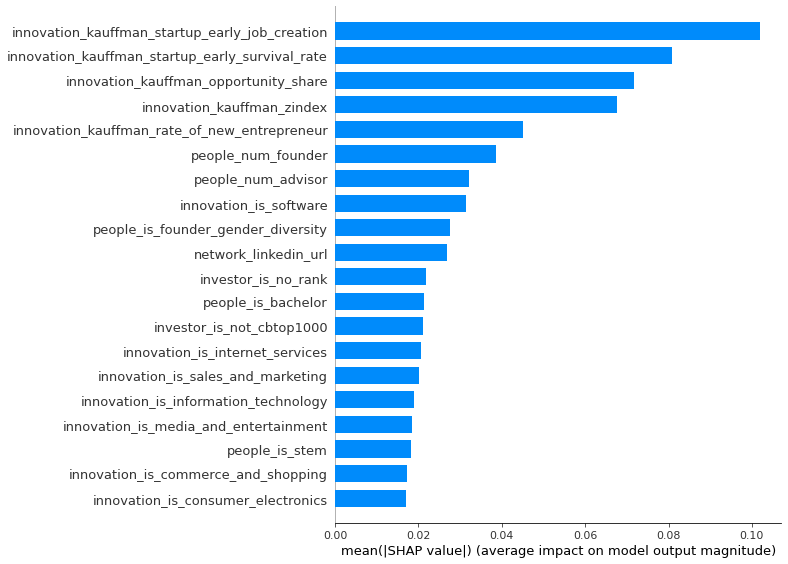

In [41]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")